In [402]:
# Gerekli kütüphaneleri import ediyoruz.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Grafiklerin üzerindeki uyarı yazılarını gizlemek istiyorum.
import warnings
warnings.filterwarnings("ignore")


# Verisetimi inceliyorum.


In [403]:
# Asıl veriyi bozmamak için kopya üzerinde çalışıyoruz.

insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [405]:
# Kadın ve Erkek sayısı.
gender_counts = df["sex"].value_counts()
print(gender_counts)

male      676
female    662
Name: sex, dtype: int64


In [406]:
# Sigara içen ve içmeyen kişi sayısı.
smoker_counts = df["smoker"].value_counts()
print(smoker_counts)


no     1064
yes     274
Name: smoker, dtype: int64


In [407]:
# Bölgere göre kişi sayısı.
region_distribution = df["region"].value_counts()
print(region_distribution)


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [408]:
# Bölgelere göre sigara içen ve içmeyen kişi sayıları..
region_smoker_counts = df.groupby(["region", "smoker"])["smoker"].count()

print("Bölgeye Göre Sigara İçen ve İçmeyen Kişi Sayıları:")
print(region_smoker_counts)


Bölgeye Göre Sigara İçen ve İçmeyen Kişi Sayıları:
region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64


Yaş Dağılımı:
18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64


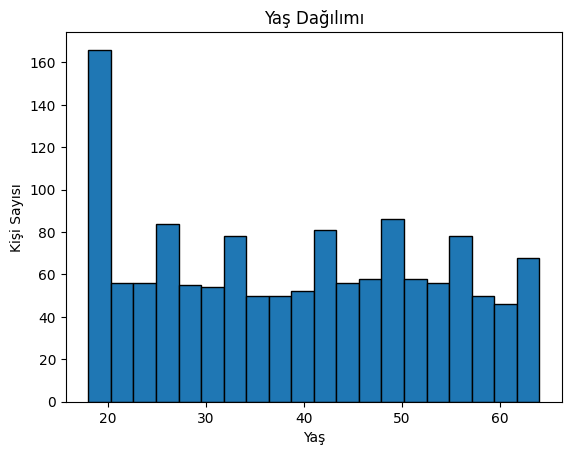

In [409]:
# Yaş dağılımını görmek istiyoruz.
age_distribution = df['age'].value_counts().sort_index()

print("Yaş Dağılımı:")
print(age_distribution)

# Ayrıca yaş dağılımını histogram ile görüyoruz.

import matplotlib.pyplot as plt

plt.hist(df["age"], bins=20, edgecolor="k")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.title("Yaş Dağılımı")
plt.show()


In [410]:
# Kilolu olup olmadığını görmek istiyoruz.
def determine_weight_status(bmi):
    if bmi < 18.5:
        return "Zayıf"
    elif 18.5 <= bmi < 25:
        return "İdeal Kilo"
    elif 25 <= bmi < 30:
        return "Şişman"
    else:
        return "Obez"


df["kilolu"] = df["bmi"].apply(determine_weight_status)

# Kadın ve erkek olarak ayırıyoruz.
female_group = df[df["sex"] == "female"]
male_group = df[df["sex"] == "male"]

# Kadın grubu
female_weight_status = female_group["kilolu"].value_counts()
print("Kadın Kilolu Olma Durumu:")
print(female_weight_status)

# Erkek grubu
male_weight_status = male_group["kilolu"].value_counts()
print("\nErkek Kilolu Olma Durumu:")
print(male_weight_status)


Kadın Kilolu Olma Durumu:
Obez          334
Şişman        199
İdeal Kilo    117
Zayıf          12
Name: kilolu, dtype: int64

Erkek Kilolu Olma Durumu:
Obez          373
Şişman        187
İdeal Kilo    108
Zayıf           8
Name: kilolu, dtype: int64


In [411]:
# Bölgelere göre çocuk sayılarını gösteriyoruz.
region_child_counts = df.groupby('region')['children'].sum()

print("Bölgeye Göre Toplam Çocuk Sayıları:")
print(region_child_counts)


Bölgeye Göre Toplam Çocuk Sayıları:
region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


In [412]:
# Belirli çocuk sayısına sahip kişileri görüyoruz.
child_counts = df['children'].value_counts().sort_index()

print("Belirli Çocuk Sayısına Sahip Kişilerin Dağılımı:")
print(child_counts)


Belirli Çocuk Sayısına Sahip Kişilerin Dağılımı:
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


# Vücut Kitle İndeksini Maaşa göre dağılımı.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

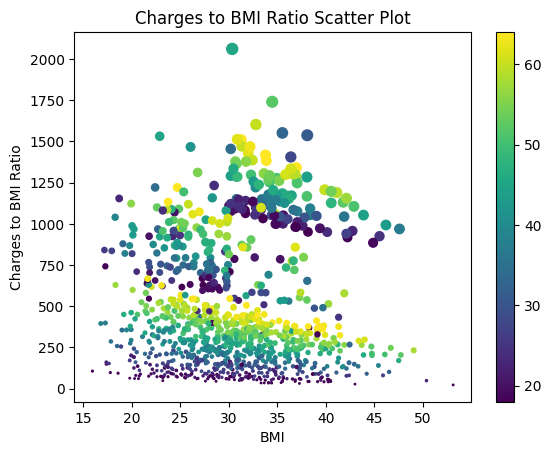

In [413]:
# Veri kümesini 'insurance.csv' dosyasından yükle
df = pd.read_csv('insurance.csv')

# İlk 5 veriyi kontrol et
df.head()

# Veri kümesi hakkında bilgi al
print(df.info())

# Veri kümesinin genel istatistiklerini görüntüle
print(df.describe())

# Cinsiyet dağılımını görselleştir
print(df['sex'].value_counts())

# Bölge dağılımını görselleştir
print(df['region'].value_counts())

# Sigara kullanımı dağılımını görselleştir
print(df['smoker'].value_counts())

# Verileri eğitim ve test setlerine ayır
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Eğitim setinin ilk 5 verisini görüntüle
train_set.head()

# Eğitim setinin bir kopyasını oluştur
train_set_2 = train_set.copy()

# Yaş değerlerini gruplara ayır
yas_deger = [18, 30, 45, 60, 99]
yas_baslik = ["18-30", "30-45", "45-60", "60+"]
train_set_2["age_group"] = pd.cut(train_set_2["age"], bins=yas_deger, labels=yas_baslik, right=False)

# BMI değerlerini kategorilere ayır
bmi_deger = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ["Zayıf", "Normal", "Kilolu", "Obez"]
train_set_2["bmi_group"] = pd.cut(train_set_2["bmi"], bins=bmi_deger, labels=bmi_labels, right=False)

# Charges ve BMI oranını hesapla ve grafiğini çizdir
train_set_2["charges_bmi_ratio"] = np.round(train_set_2["charges"] / train_set_2["bmi"])
sc = plt.scatter(x=train_set_2["bmi"], y=train_set_2["charges_bmi_ratio"], alpha=1, s=train_set_2["charges"] / 1000, c=train_set_2["age"])
plt.colorbar(sc)
plt.xlabel("BMI")
plt.ylabel("Charges to BMI Ratio")
plt.title("Charges to BMI Ratio Scatter Plot")
plt.show()

# Sigara içenler ve Maaşları arasındaki ilişki.


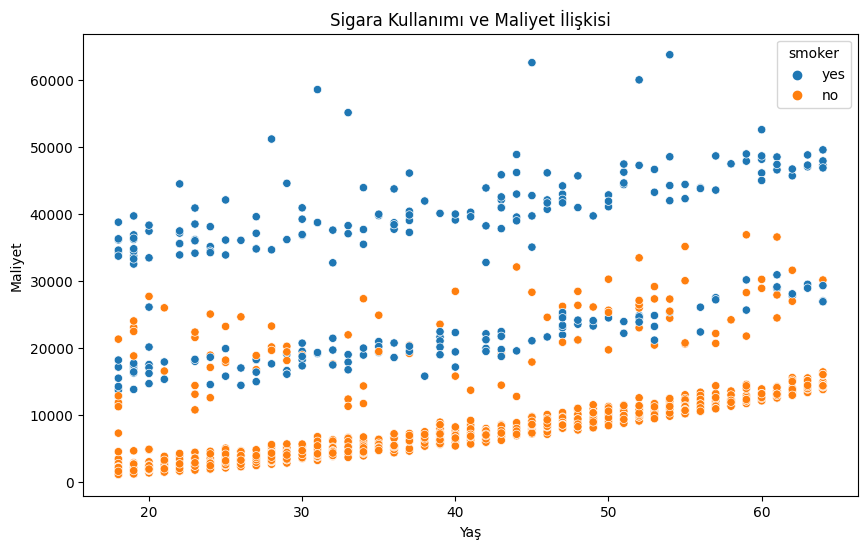

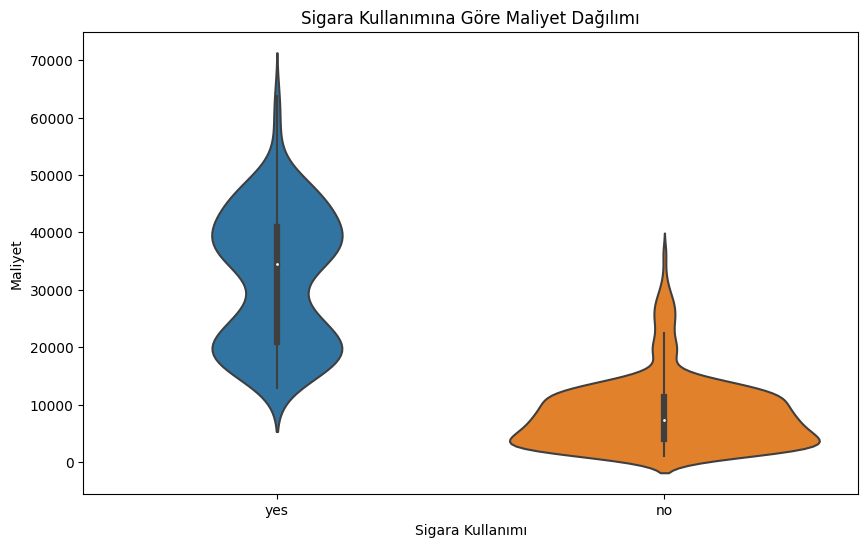

In [414]:
# Scatter plot oluştur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Sigara Kullanımı ve Maliyet İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Maliyet")
plt.show()

# Violin plot oluştur
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df)
plt.title("Sigara Kullanımına Göre Maliyet Dağılımı")
plt.xlabel("Sigara Kullanımı")
plt.ylabel("Maliyet")
plt.show()


# Bölgere göre sigara içenlerin dağılımı


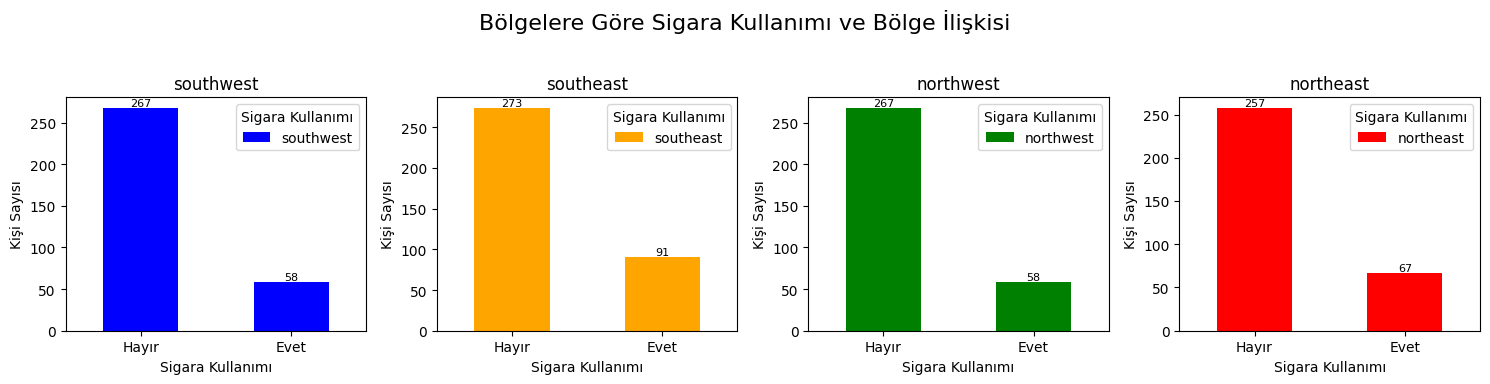

In [415]:
# Veri kümenizden farklı bölgeleri alın
regions = df["region"].unique()

# Her bir bölge için kullanılacak renkleri tanımlayın
colors = ['blue', 'orange', 'green', 'red']

# Alt grafiklerin sıralanacağı figürü hazırlayın
fig, axes = plt.subplots(1, len(regions), figsize=(15, 4))

# Her bir bölge için döngü başlatın
for i, region in enumerate(regions):
    # Seçilen bölgeye ait verileri alın
    region_df = df[df["region"] == region]

    # Sigara kullanımı ve bölge ilişkisini çapraz tablo olarak oluşturun
    smoker_region_cross = pd.crosstab(region_df["smoker"], region_df["region"])

    # Alt grafiklerin sıralandığı figürde yeni bir alt grafik alanı oluşturun
    ax = smoker_region_cross.plot(kind="bar", stacked=True, color=colors[i], ax=axes[i])

    # Eksen etiketlerini ayarlayın
    ax.set_xlabel("Sigara Kullanımı")
    ax.set_ylabel("Kişi Sayısı")
    ax.set_title(region)
    ax.set_xticklabels(["Hayır", "Evet"], rotation=0)

    # Lejantı ayarlayın
    ax.legend(title="Sigara Kullanımı")

    # Her bir barın üstüne kişi sayılarını ekleyin
    for j, container in enumerate(ax.containers):
        for bar in container:
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom', fontsize=8)

# Ortak başlık ekleyin
fig.suptitle("Bölgelere Göre Sigara Kullanımı ve Bölge İlişkisi", fontsize=16)

# Grafiklerin uygun şekilde sığmasını sağlamak için düzenleme yapın
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Vücut Kitle İndeksi ve Cinsiyet arasındaki ilişki


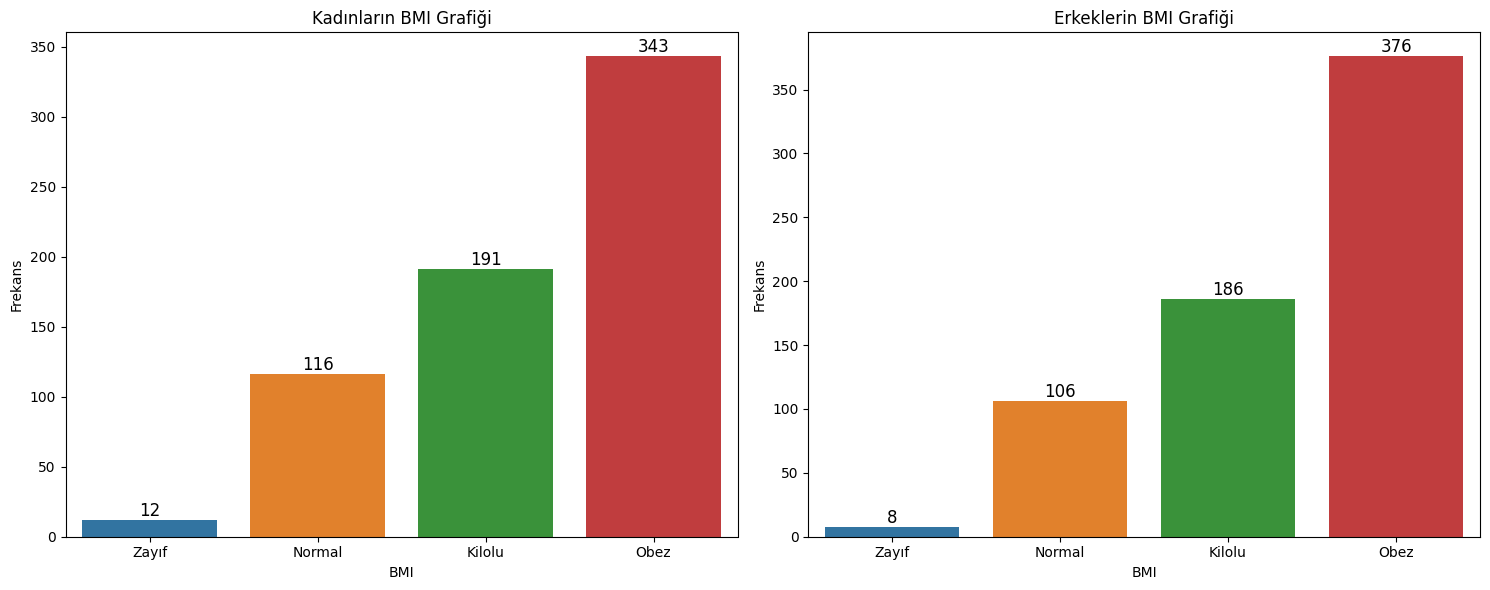

In [416]:
# Veri setini yükle (veri seti dosyasını 'df.csv' ile değiştirin)
df = pd.read_csv('insurance.csv')

# Yalnızca kadın katılımcıları içeren veriyi filtrele
female_data = df[df['sex'] == 'female']

# BMI kategorilerini ve etiketlerini tanımla
bmi_deger = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ["Zayıf", "Normal", "Kilolu", "Obez"]

# BMI değerlerini kategorilere ayır
female_data['bmi_category'] = pd.cut(female_data['bmi'], bins=bmi_deger, labels=bmi_labels, right=False)

# Kadınlar için bir çubuk grafiği oluştur
plt.figure(figsize=(15, 6))

# İki grafik yan yana görüntülemek için alt çizelgeler oluştur
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='bmi_category', data=female_data, order=bmi_labels)
plt.title("Kadınların BMI Grafiği")
plt.xlabel("BMI")
plt.ylabel("Frekans")

# Çubukların üstüne sayı etiketleri ekle
for p in ax1.patches:
    height = p.get_height()
    if p.get_y() == 0:
        ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=12)

# Yalnızca erkek katılımcıları içeren veriyi filtrele
male_data = df[df['sex'] == 'male']

# Erkekler için BMI değerlerini kategorilere ayır
male_data['bmi_category'] = pd.cut(male_data['bmi'], bins=bmi_deger, labels=bmi_labels, right=False)

# Erkekler için bir çubuk grafiği oluştur
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='bmi_category', data=male_data, order=bmi_labels)
plt.title("Erkeklerin BMI Grafiği")
plt.xlabel("BMI")
plt.ylabel("Frekans")

# Çubukların üstüne sayı etiketleri ekle
for p in ax2.patches:
    height = p.get_height()
    if p.get_y() == 0:
        ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=12)

# Grafikleri sıkıştırılmış bir şekilde göster
plt.tight_layout()
plt.show()

# Bölgere göre Çocuk sayısı dağılımı


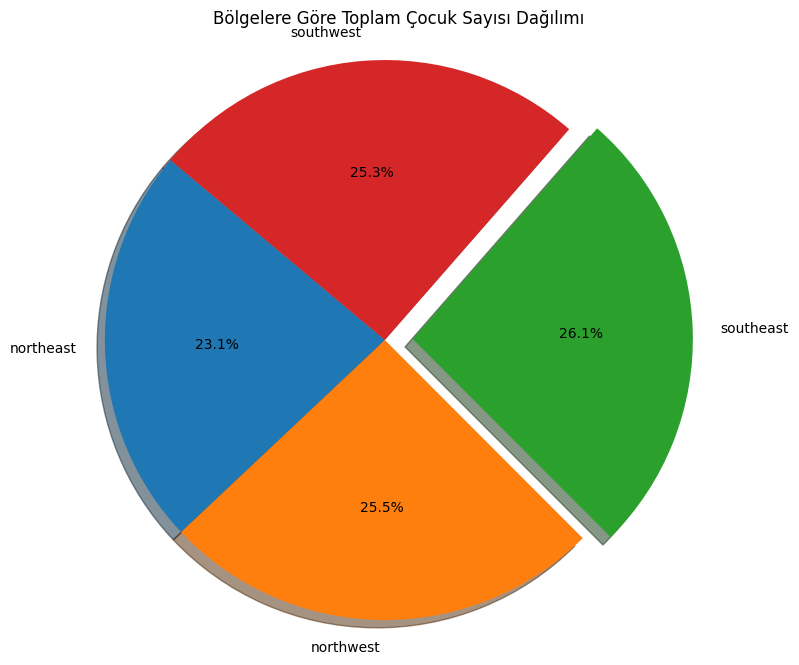

In [417]:
# Bölge isimleri.
regions = ['northeast', 'northwest', 'southeast', 'southwest']

# Bölgeye göre toplam çocuk sayıları.
children_counts = [339, 373, 382, 371]

# En yüksek çocuk sayısına sahip bölgeyi belirle.
most_children_region = regions[children_counts.index(max(children_counts))]

# En büyük parçayı öne çıkarmak için explode listesini hazırla.
explode = [0.1 if region == most_children_region else 0 for region in regions]

# Pasta grafiğini oluştur.
plt.figure(figsize=(8, 8))
plt.pie(children_counts, labels=regions, explode=explode, autopct="%1.1f%%", startangle=140, shadow=True)
plt.axis("equal")  # Daireyi yuvarlak göstermek için
plt.title("Bölgelere Göre Toplam Çocuk Sayısı Dağılımı")
plt.show()


# Yaş ve Vücut Kitle İndeksi arasındaki ilişki


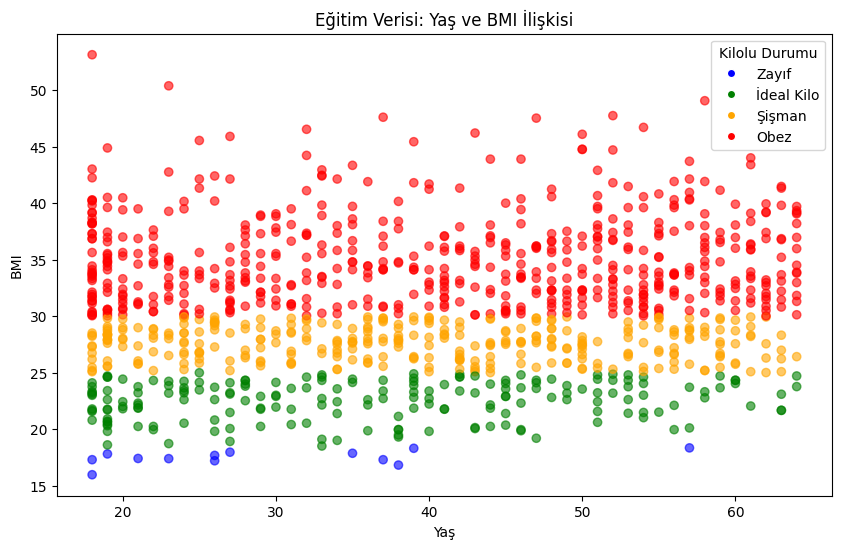

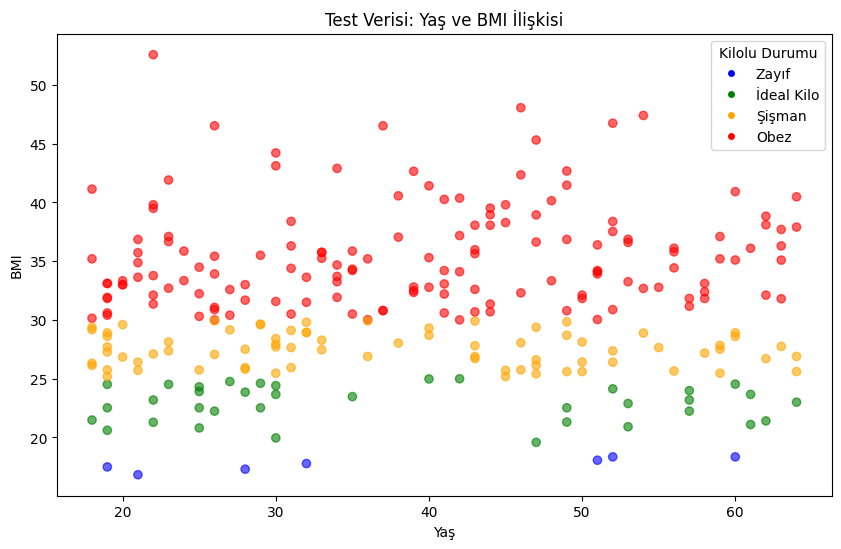

In [418]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# "kilolu" sütunu adında yeni bir sütun ekleyin
X_train["kilolu"] = X_train["bmi"].apply(determine_weight_status)
X_test["kilolu"] = X_test["bmi"].apply(determine_weight_status)

# Scatter plot oluşturun
plt.figure(figsize=(10, 6))
colors = {'Zayıf':'blue', 'İdeal Kilo':'green', 'Şişman':'orange', 'Obez':'red'}
plt.scatter(X_train["age"], X_train["bmi"], c=X_train["kilolu"].apply(lambda x: colors[x]), alpha=0.6)
plt.xlabel("Yaş")
plt.ylabel("BMI")
plt.title("Eğitim Verisi: Yaş ve BMI İlişkisi")
# Renklerin açıklamalarını ekleyin
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_labels, title="Kilolu Durumu")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test["age"], X_test["bmi"], c=X_test["kilolu"].apply(lambda x: colors[x]), alpha=0.6)
plt.xlabel("Yaş")
plt.ylabel("BMI")
plt.title("Test Verisi: Yaş ve BMI İlişkisi")
# Renklerin açıklamalarını ekleyin
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_labels, title="Kilolu Durumu")
plt.show()


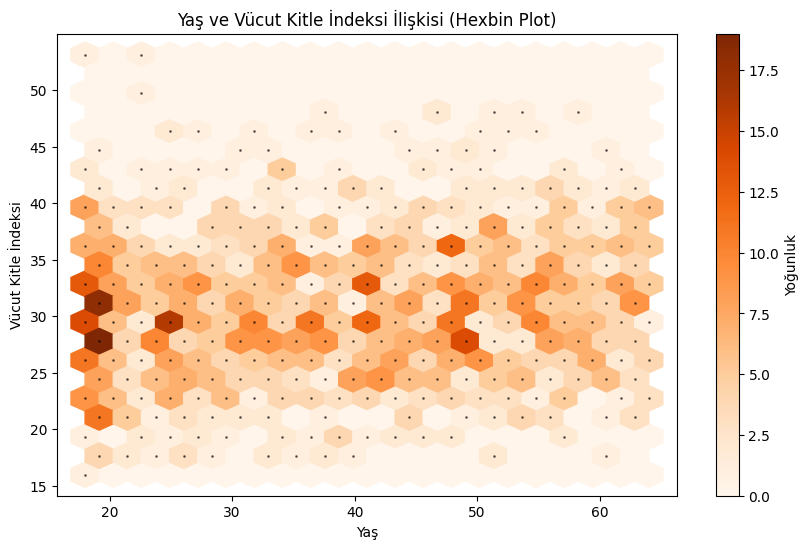

In [419]:

plt.figure(figsize=(10, 6))

# Hexbin plot oluşturma
hb = plt.hexbin(df['age'], df['bmi'], gridsize=20, cmap=plt.cm.get_cmap('Oranges'))
plt.title('Yaş ve Vücut Kitle İndeksi İlişkisi (Hexbin Plot)')
plt.xlabel('Yaş')
plt.ylabel('Vücut Kitle İndeksi')
plt.colorbar(label='Yoğunluk')

# Sadece yoğunluğu olan altıgenleri işaretleyin
dense_hexagons = hb.get_array() > 0

# Altıgenlerin merkez noktalarını alın
bin_centers = hb.get_offsets()[dense_hexagons]

# Yoğunluğu olan altıgenlerin merkezlerine noktalar ekleyin
plt.plot(bin_centers[:, 0], bin_centers[:, 1], 'k.', markersize=2, alpha=0.5)

plt.show()


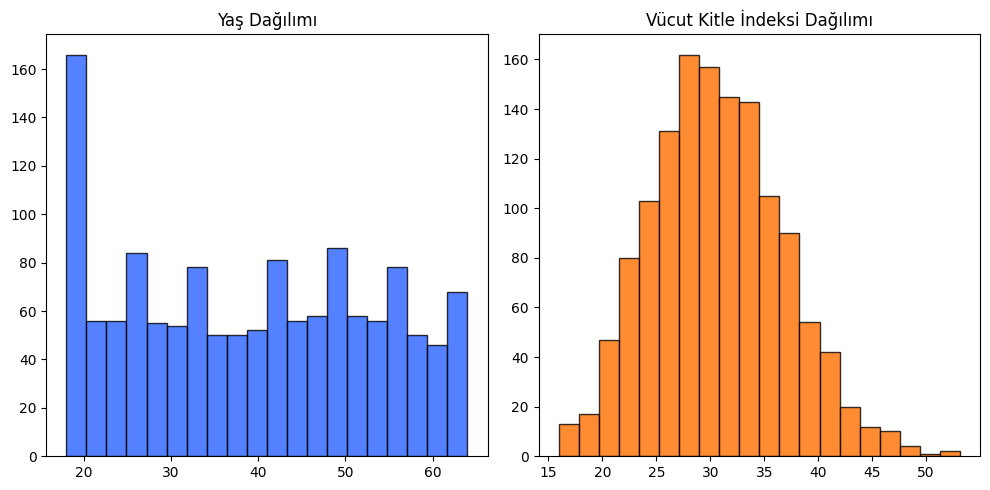

In [420]:
# Histogram çizimi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, color='#2962ff', edgecolor='black', alpha=0.8)
plt.title('Yaş Dağılımı')

plt.subplot(1, 2, 2)
plt.hist(df['bmi'], bins=20, color='#ff6f00', edgecolor='black', alpha=0.8)
plt.title('Vücut Kitle İndeksi Dağılımı')

plt.tight_layout()
plt.show()


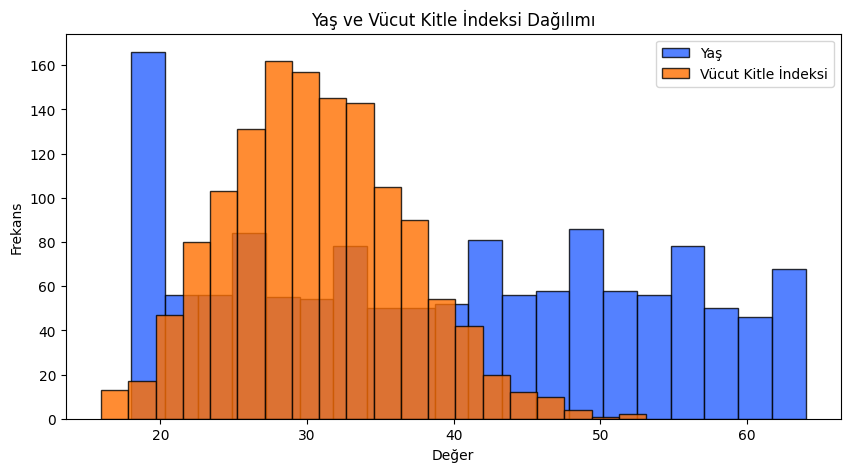

In [421]:
# İki histogramı üst üste gösteriyoruz.
plt.figure(figsize=(10, 5))

# Burada çubukların kenar çizgilerini ekliyoruz.
plt.hist(df['age'], bins=20, color='#2962ff', alpha=0.8, edgecolor='black', label='Yaş')
plt.hist(df['bmi'], bins=20, color='#ff6f00', alpha=0.8, edgecolor='black', label='Vücut Kitle İndeksi')

plt.title('Yaş ve Vücut Kitle İndeksi Dağılımı')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.legend()
plt.show()


# Vücut Kitle İndeksi ile Çocuklar arasındaki ilişki

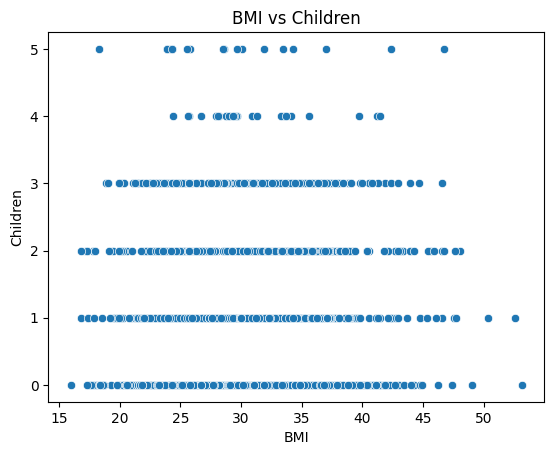

In [422]:
# Scatter plot ile "BMI" ve "Children" ilişkisini gösteriyoruz.
sns.scatterplot(data=df, x="bmi", y="children")
plt.title("BMI vs Children")
plt.xlabel("BMI")
plt.ylabel("Children")
plt.show()

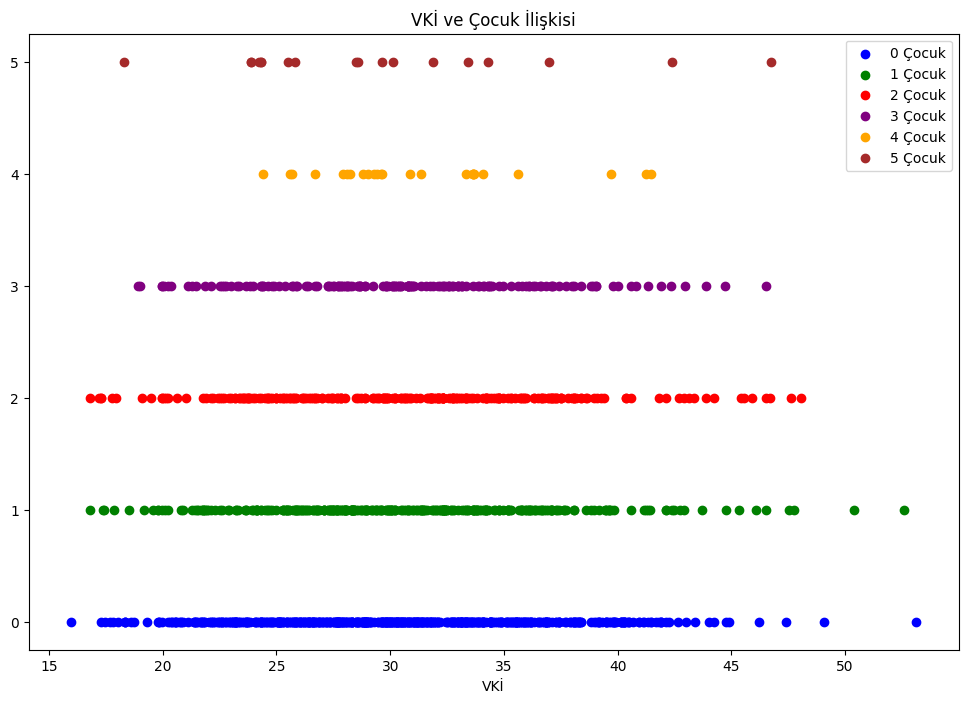

In [423]:
# Burada farklı çocuk sayısı için farklı renk kullandım.
child_counts = [0, 1, 2, 3, 4, 5]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

plt.figure(figsize=(12, 8))

for i, child_count in enumerate(child_counts):
    subset = df[df["children"] == child_count]
    plt.scatter(subset["bmi"], subset["children"], color=colors[i], label=f"{child_count} Çocuk")

plt.xlabel("VKİ")
plt.ylabel("")
plt.title("VKİ ve Çocuk İlişkisi")
plt.legend()
plt.show()


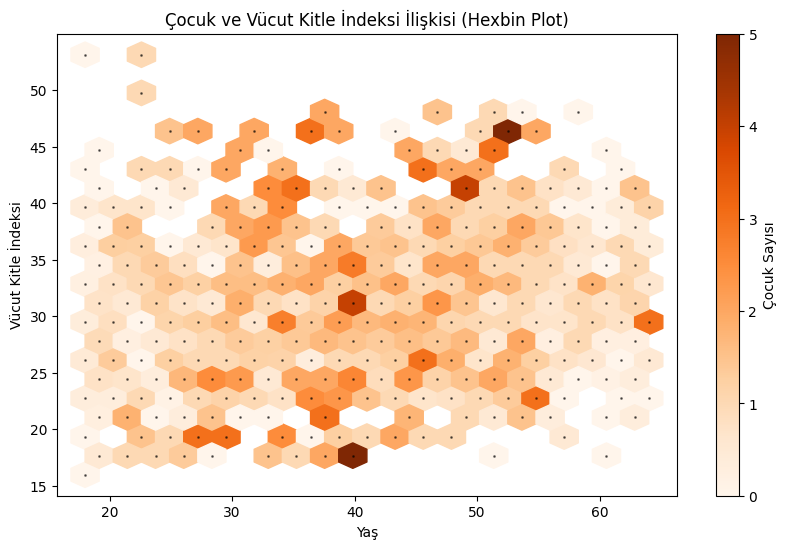

In [424]:
# Hexbin plot ile gösteriyoruz.
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['age'], df['bmi'], df['children'],  gridsize=20, cmap=plt.cm.get_cmap('Oranges'))
plt.title('Çocuk ve Vücut Kitle İndeksi İlişkisi (Hexbin Plot)')
plt.xlabel('Yaş')
plt.ylabel('Vücut Kitle İndeksi')
plt.colorbar(label='Çocuk Sayısı')

dense_hexagons = hb.get_array() >= 0
bin_centers = hb.get_offsets()[dense_hexagons]
plt.plot(bin_centers[:, 0], bin_centers[:, 1], 'k.', markersize=2, alpha=0.5)

plt.show()


# BMI değişkeninde aykırı değerler var mı?

In [425]:
# IQR ile aykırı değerleri tespit ediyoruz
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]

print("Aykırı Değerler:")
print(outliers)


Aykırı Değerler:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


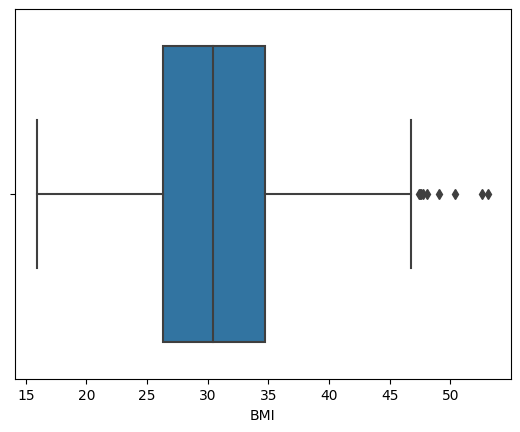

In [426]:
# Tespit ettiğimiz aykırı değerleri Boxplot kullanarak gösteriyoruz.
sns.boxplot(x=df["bmi"])
plt.xlabel("BMI")
plt.show()

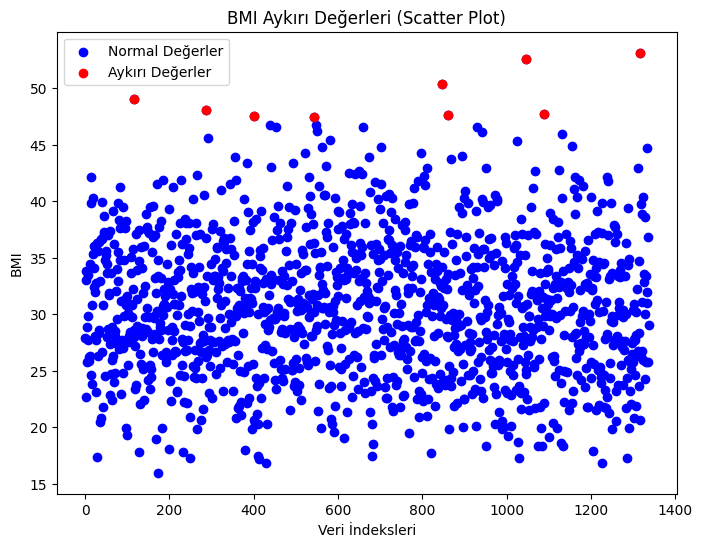

In [427]:
# Scatter plot ile aykırı değerleri kırmızı olarak gösteriyoruz.
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df["bmi"], c='blue', label='Normal Değerler')
plt.scatter(outliers.index, outliers["bmi"], c='red', label='Aykırı Değerler')
plt.xlabel("Veri İndeksleri")
plt.ylabel("BMI")
plt.title("BMI Aykırı Değerleri (Scatter Plot)")
plt.legend()
plt.show()


# Vücut Kitle İndeksi ile Ücretler arasındaki ilişki

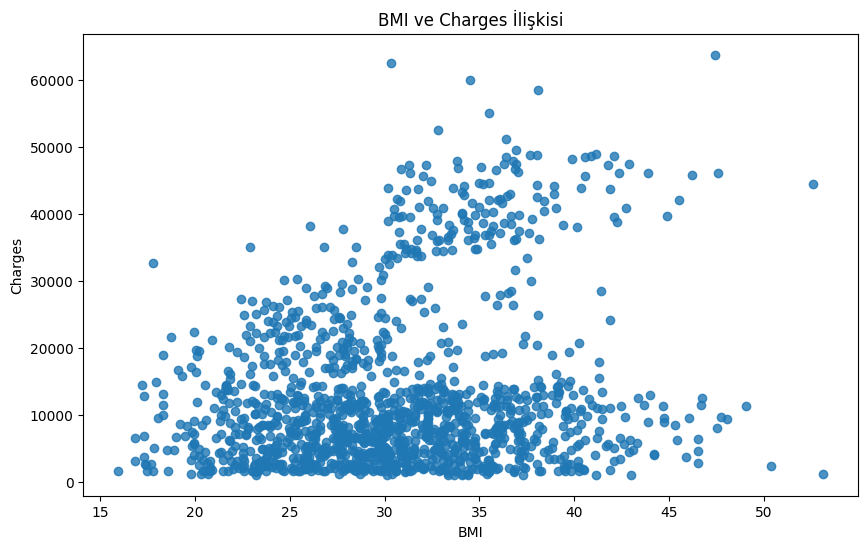

In [428]:
# Scatter plot ile "bmi" ve "charges" arasındaki ilişkiyi gösterme
plt.figure(figsize=(10, 6))
plt.scatter(df["bmi"], df["charges"], alpha=0.8)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI ve Charges İlişkisi")
plt.show()


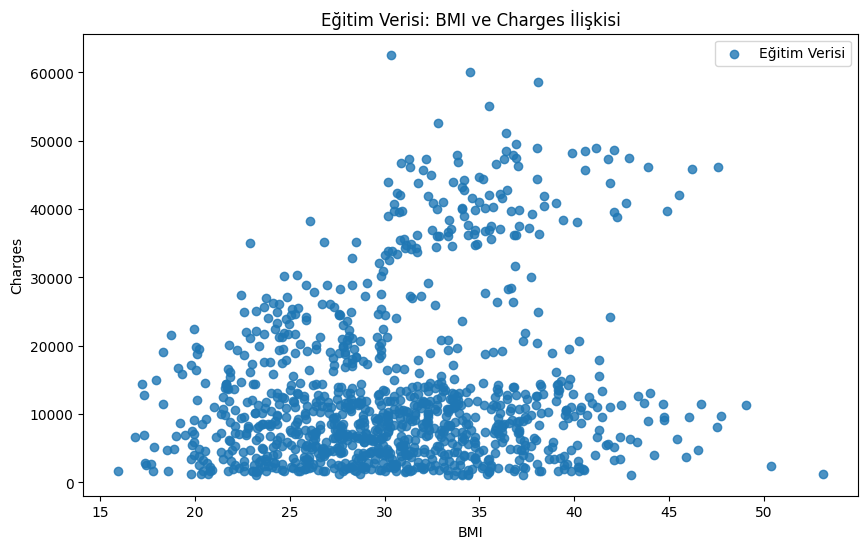

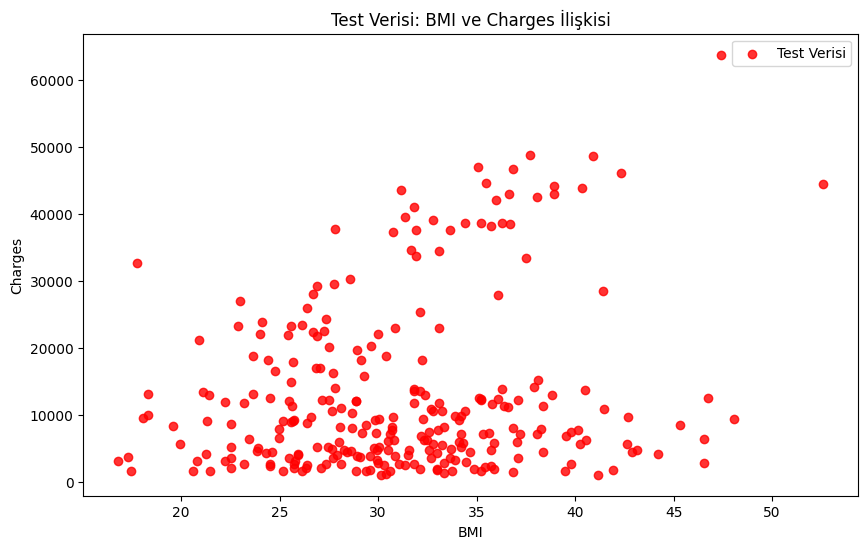

In [429]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim verisi için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train["bmi"], y_train, alpha=0.8, label="Eğitim Verisi")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Eğitim Verisi: BMI ve Charges İlişkisi")
plt.legend()
plt.show()

# Test verisi için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test["bmi"], y_test, alpha=0.8, color='r', label="Test Verisi")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Test Verisi: BMI ve Charges İlişkisi")
plt.legend()
plt.show()


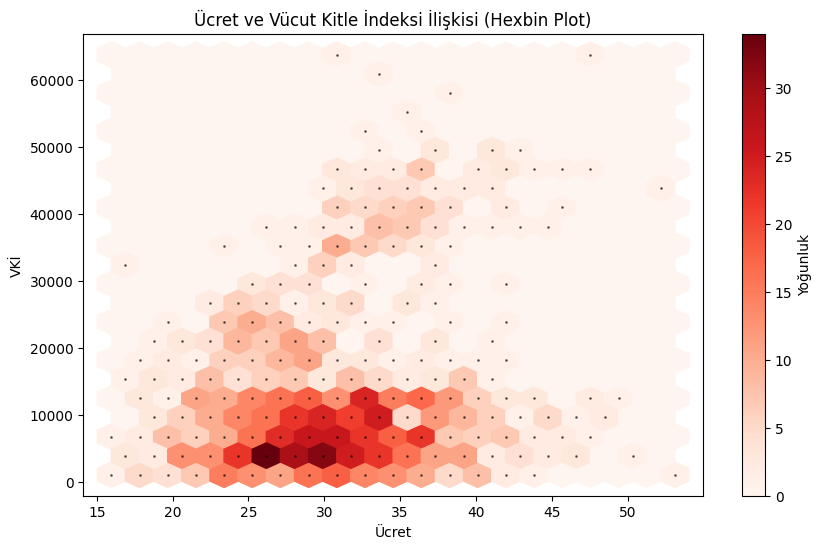

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hexbin plot çizin
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['bmi'], df['charges'], gridsize=20, cmap=plt.cm.get_cmap('Reds'))
plt.title('Ücret ve Vücut Kitle İndeksi İlişkisi (Hexbin Plot)')
plt.xlabel('Ücret')
plt.ylabel('VKİ')
plt.colorbar(label='Yoğunluk')

# Sadece yoğunluğu olan altıgenlerin indekslerini alın
dense_hexagons = hb.get_array() > 0

# Yoğunluğu olan altıgenlerin merkez noktalarını alın
bin_centers = hb.get_offsets()[dense_hexagons]

# Yoğunluğu olan altıgenlerin merkez noktalarına küçük noktaları ekleyin
plt.plot(bin_centers[:, 0], bin_centers[:, 1], 'k.', markersize=2, alpha=0.5)

plt.show()


# Çubuk grafiğini kullanarak “bölge”, “sigara içen” ve “bmi” arasındaki ilişkiyi inceleyin.

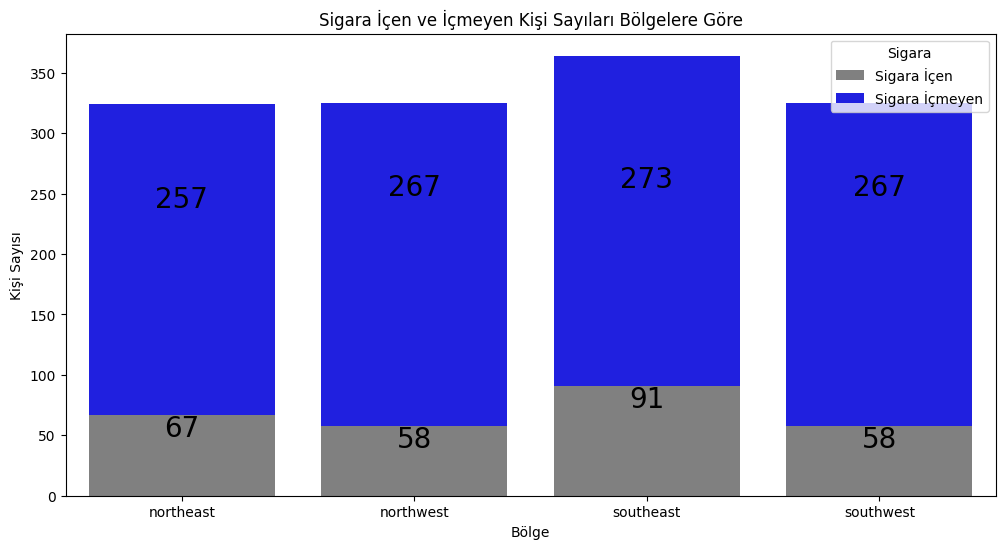

In [431]:
# Bölgere göre sigara içen ve içmeyen kişileri çubuk grafiği kullanarak gösteriyoruz.
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=region_smoker_counts.reset_index(), x="region", y="yes", color="grey", label="Sigara İçen")
ax = sns.barplot(data=region_smoker_counts.reset_index(), x="region", y="no", color="blue", label="Sigara İçmeyen", bottom=region_smoker_counts["yes"])

plt.title("Sigara İçen ve İçmeyen Kişi Sayıları Bölgelere Göre")
plt.xlabel("Bölge")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Sigara")

# Sigara içen ve içmeyen kişi sayılarını çubukların yanına ekle (tam sayı olarak)
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='top', fontsize=20, color='black')

plt.show()
